In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('oasis_longitudinal.csv')

# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [106]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [107]:
#print concise summery of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [108]:
#since the dataset contain null values also
#count total rows in each column which contain null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [109]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [110]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<Axes: xlabel='Group', ylabel='count'>

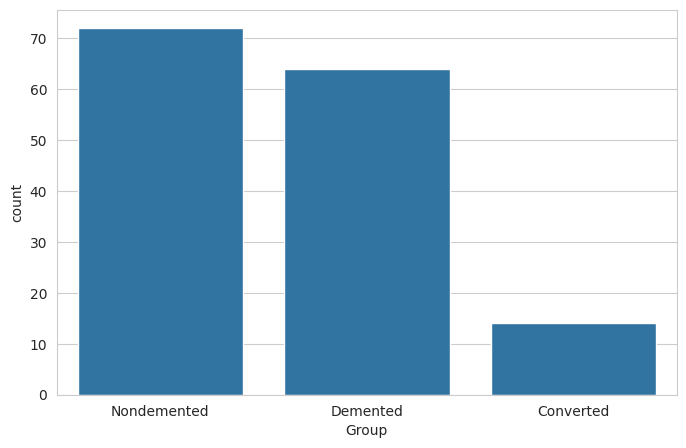

In [111]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

<ipython-input-112-eb13ba819a5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

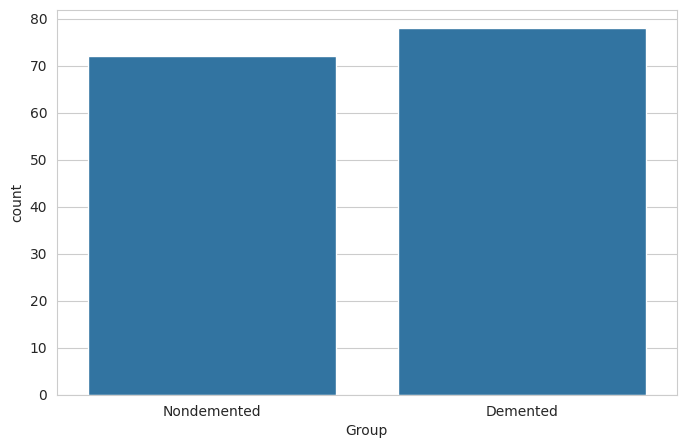

In [112]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

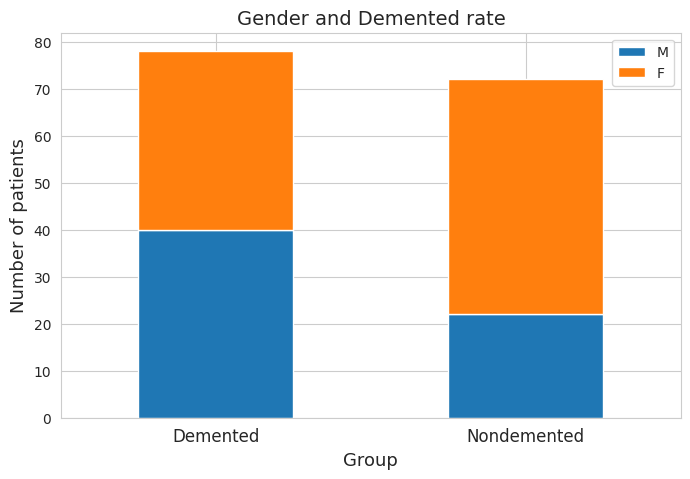

In [113]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)


# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

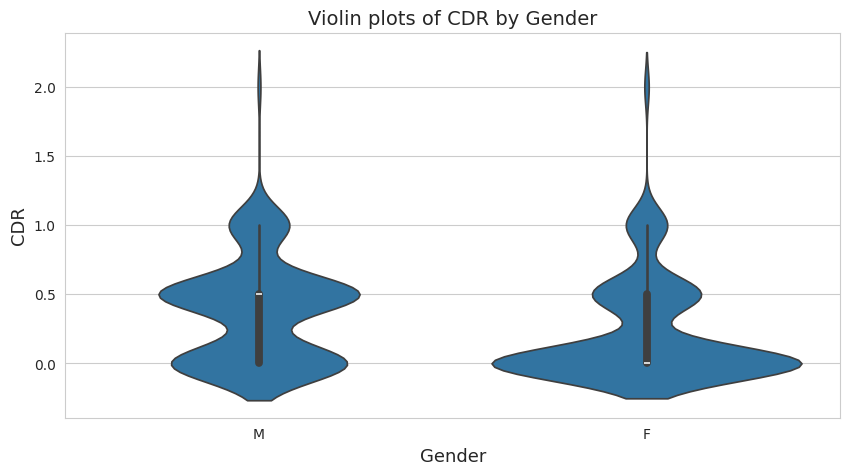

In [114]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

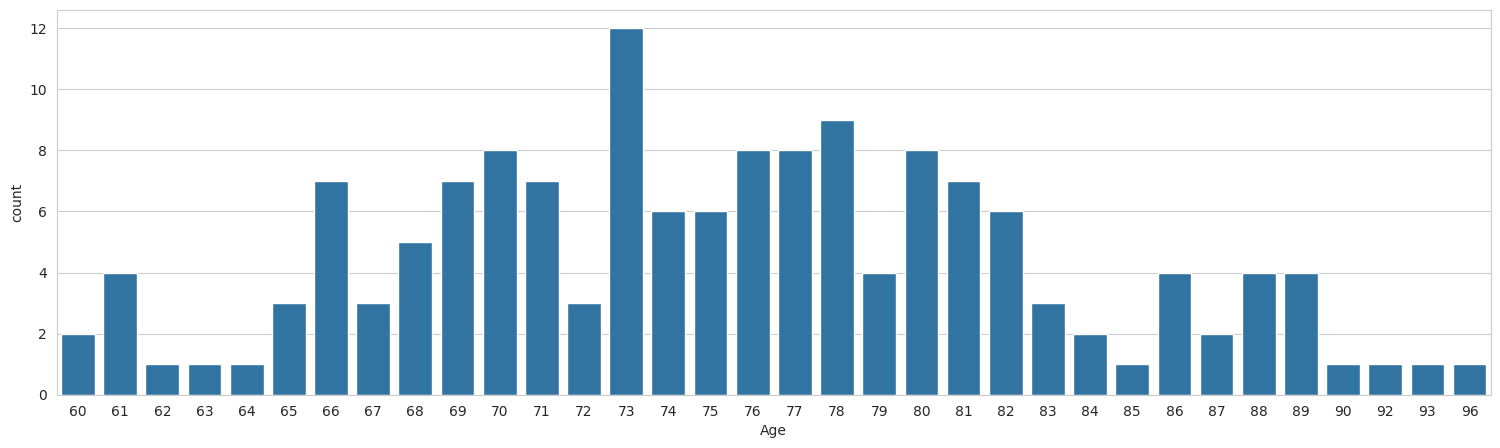

In [115]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)

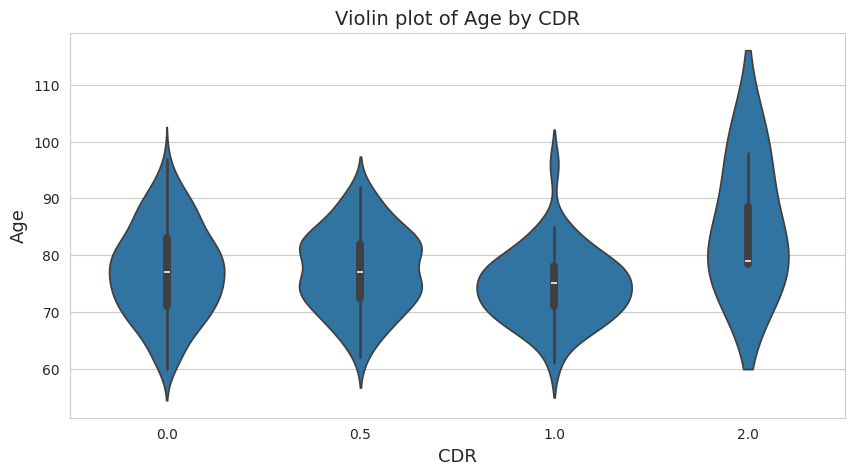

In [116]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(50.0, 100.0)

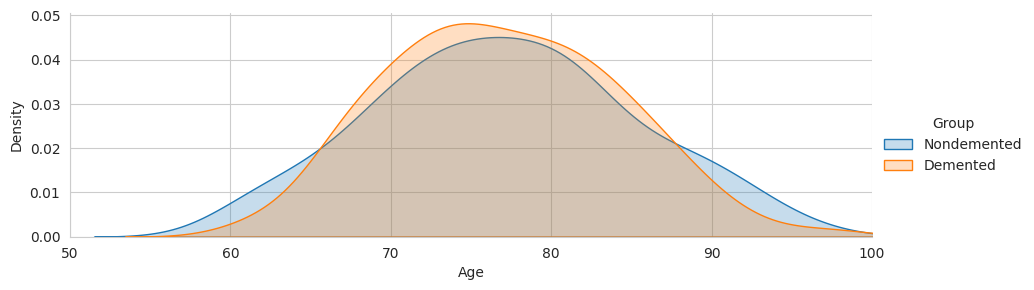

In [117]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(15.3, 30.0)

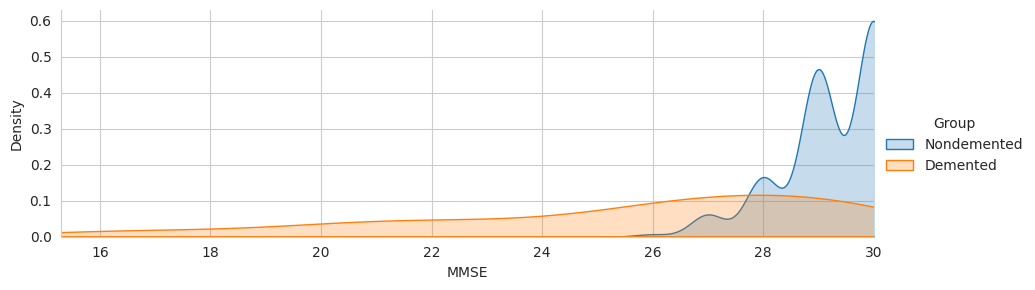

In [118]:
#MMSE Vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

In [119]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


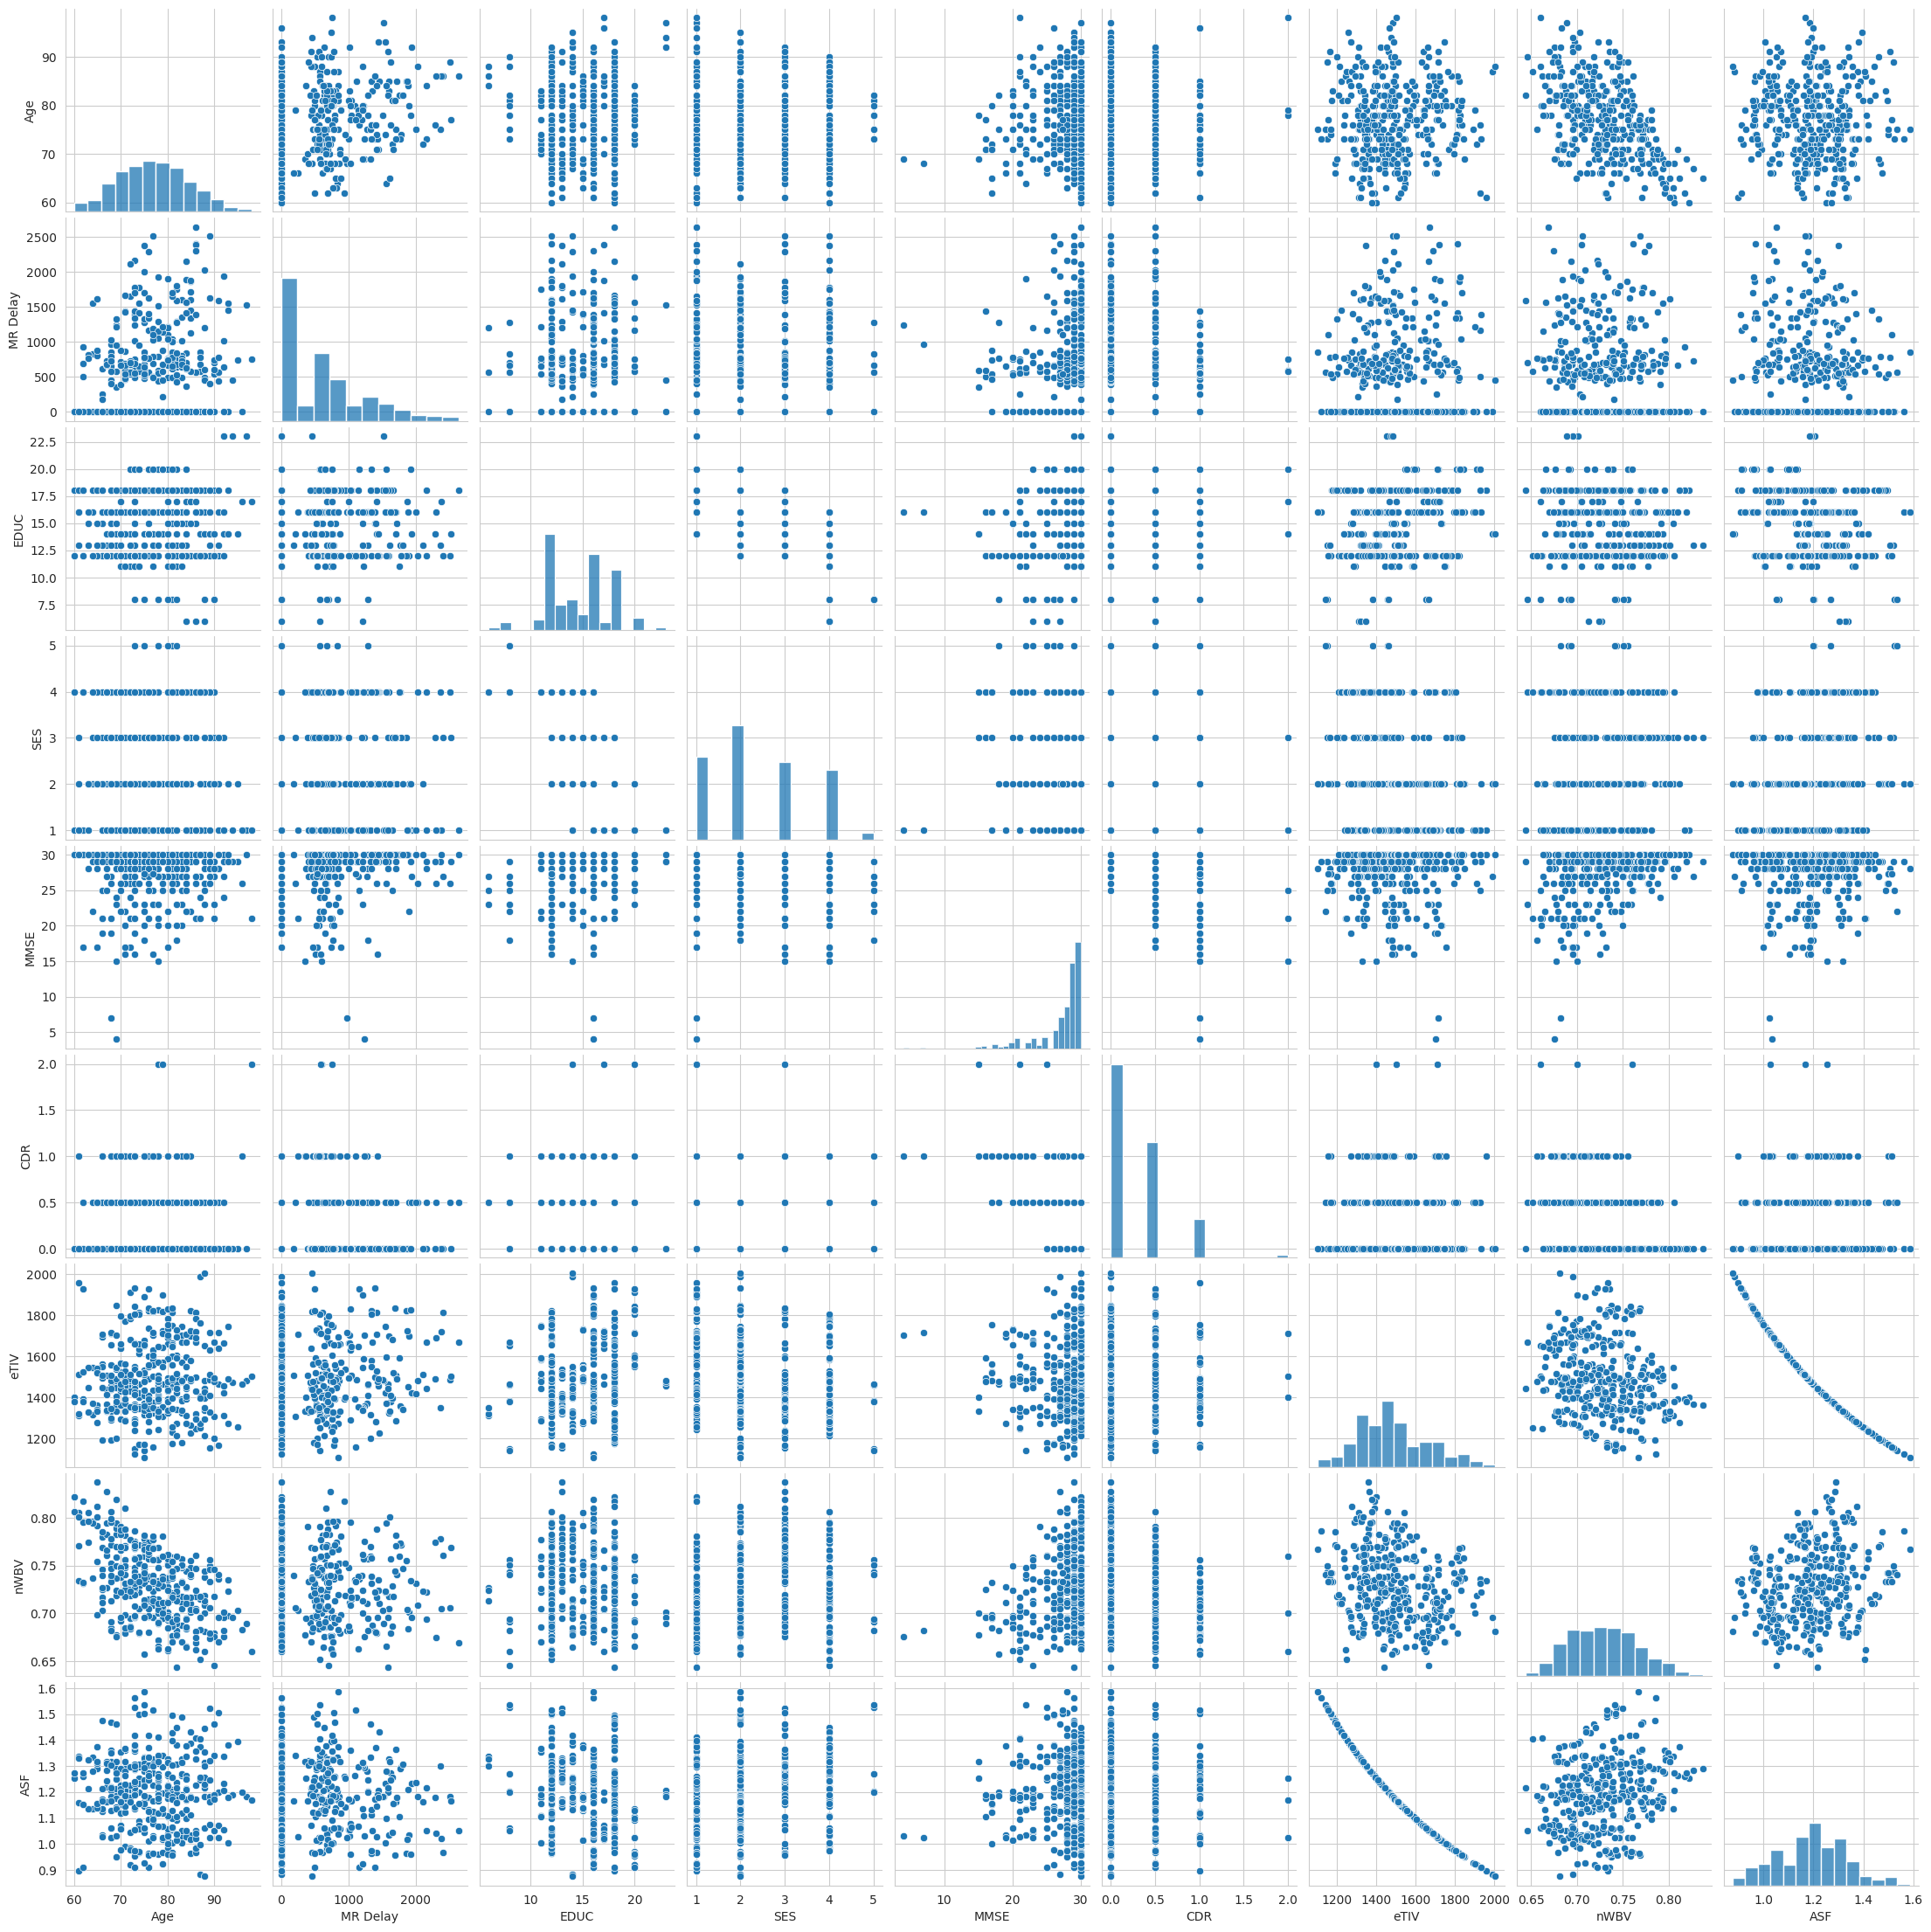

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

<ipython-input-121-6c96e63d7870>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
<ipython-input-121-6c96e63d7870>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
<ipython-input-121-6c96e63d7870>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
<ipython-input-121-6c96e63d7870>:8: FutureWarning: 

Passing `palett

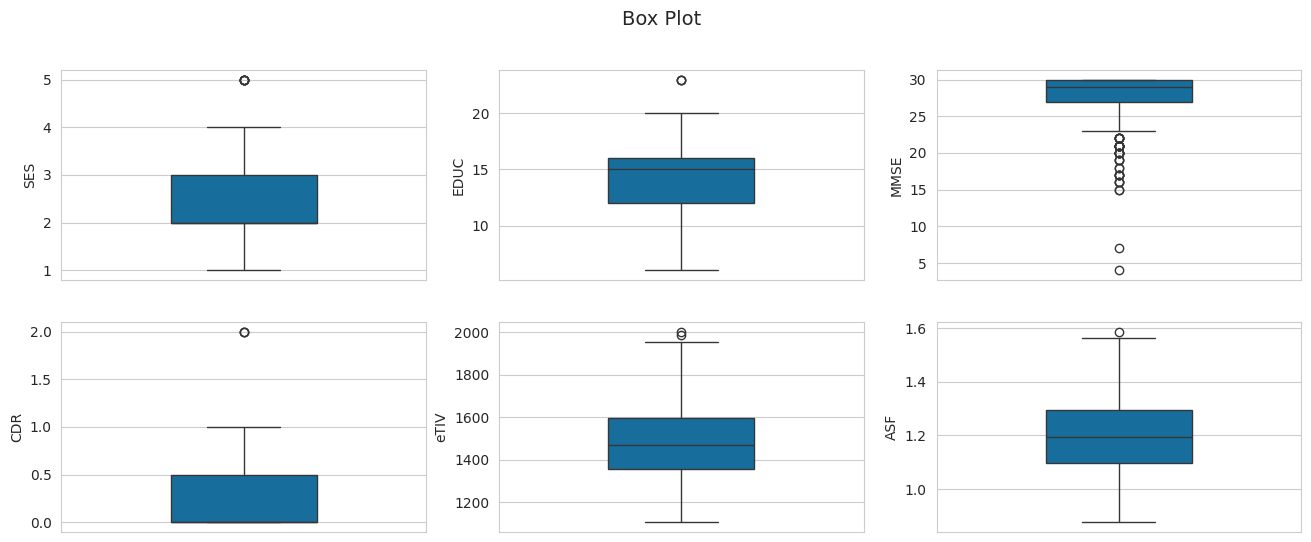

In [121]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

In [122]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [123]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })


<ipython-input-123-a7c6fb7bda4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


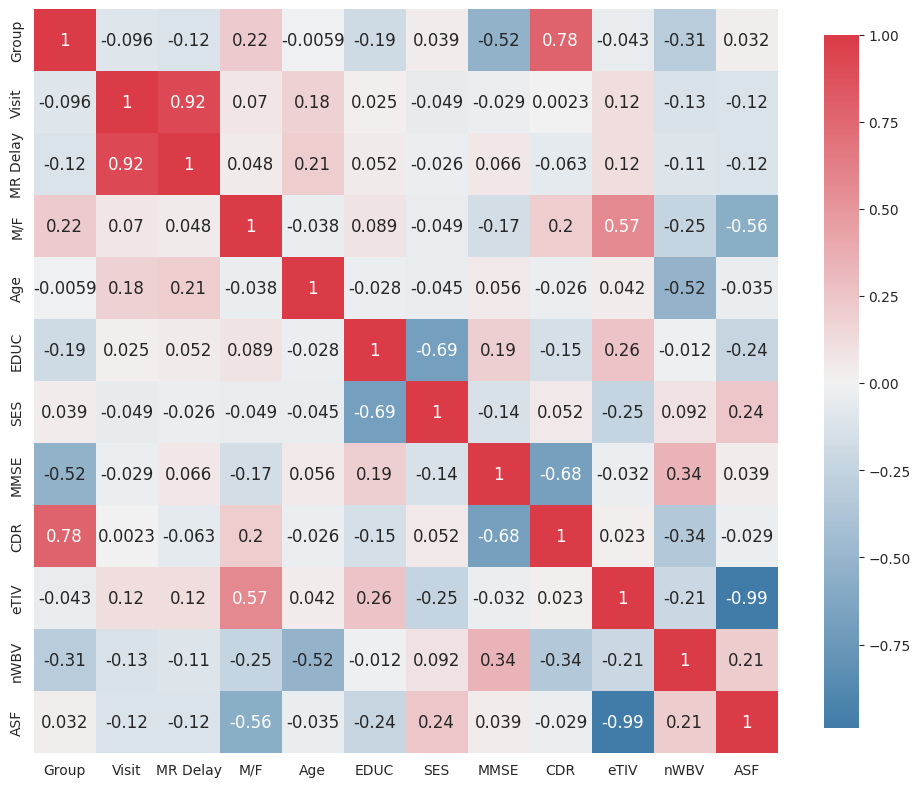

In [124]:
plot_correlation_map(df)

In [125]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [126]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [128]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [129]:
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [130]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

RANDOM FOREST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



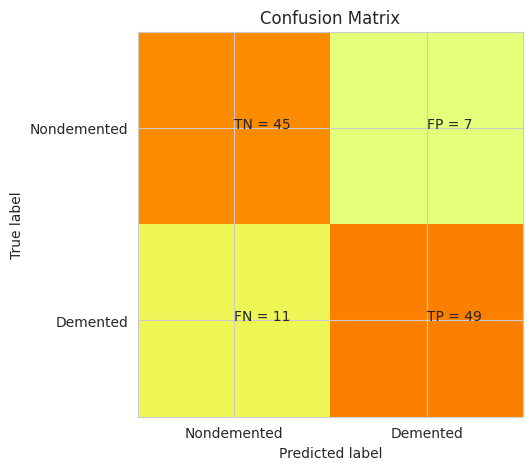

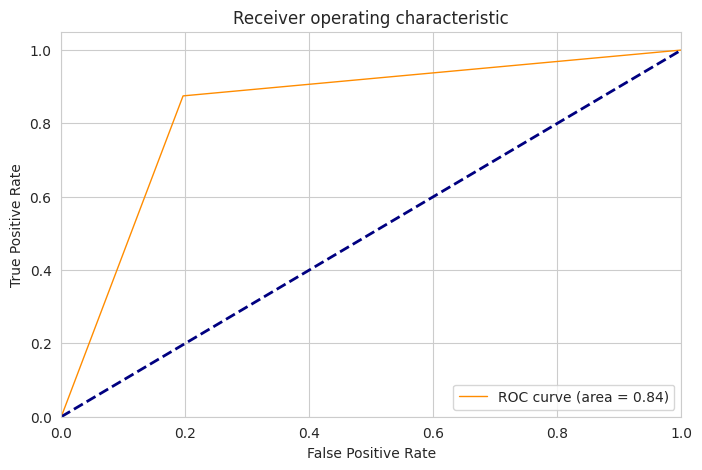


Acuuracy Of the Model:  0.8392857142857143 




In [131]:
rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc)
roc_curves(CV_rfc)
accuracy(CV_rfc)

SVM



Confusion Matrix:
[[46  6]
 [19 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.87      0.68      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



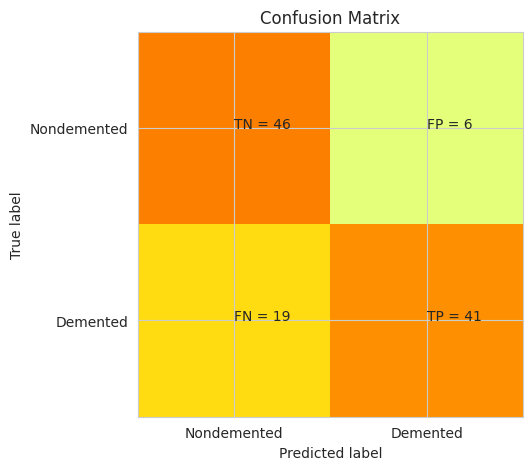

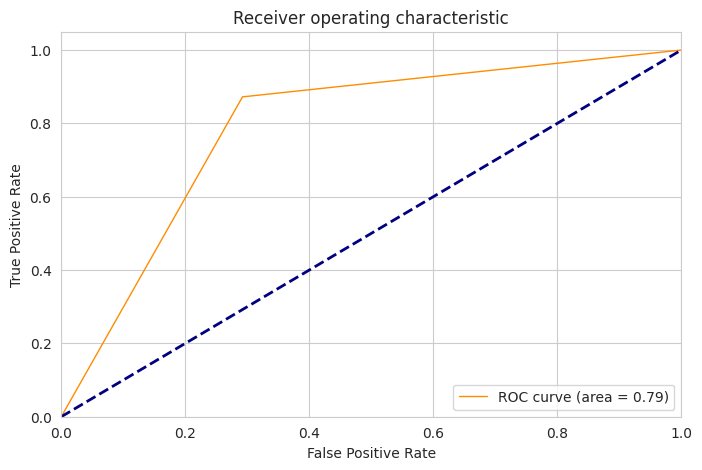


Acuuracy Of the Model:  0.7767857142857143 




In [132]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)

DECISION TREE




Confusion Matrix:
[[43  9]
 [14 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.84      0.77      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



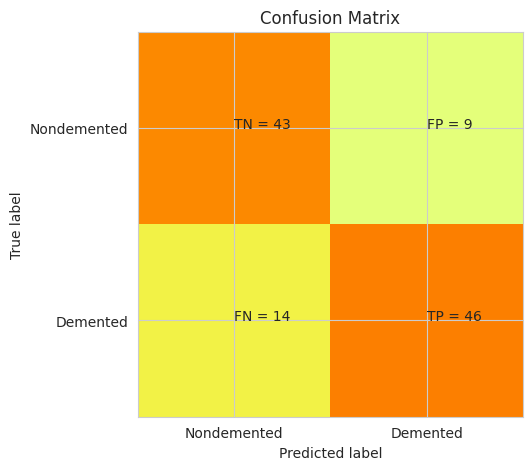

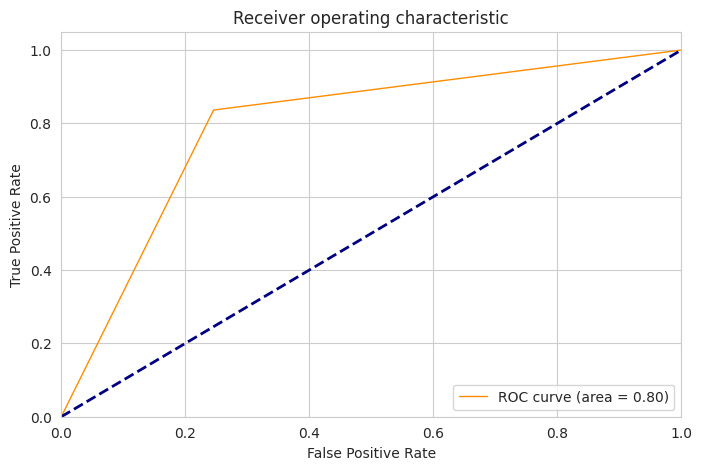


Acuuracy Of the Model:  0.7946428571428571 




In [133]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc)
roc_curves(clf_dtc)
accuracy(clf_dtc)

ANN

Epoch 1/10
7/7 [==============================] - 1s 36ms/step - loss: 0.6840 - accuracy: 0.5673 - val_loss: 0.6501 - val_accuracy: 0.6792
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.7019 - val_loss: 0.6029 - val_accuracy: 0.7358
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5833 - accuracy: 0.7404 - val_loss: 0.5653 - val_accuracy: 0.7358
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5448 - accuracy: 0.7692 - val_loss: 0.5338 - val_accuracy: 0.7547
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.7981 - val_loss: 0.5059 - val_accuracy: 0.8113
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4848 - accuracy: 0.8317 - val_loss: 0.4818 - val_accuracy: 0.8302
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4589 - accuracy: 0.8365 - val_loss: 0.4621 - val_accuracy: 0.8491
Epoch 8/10
7/7 [===============

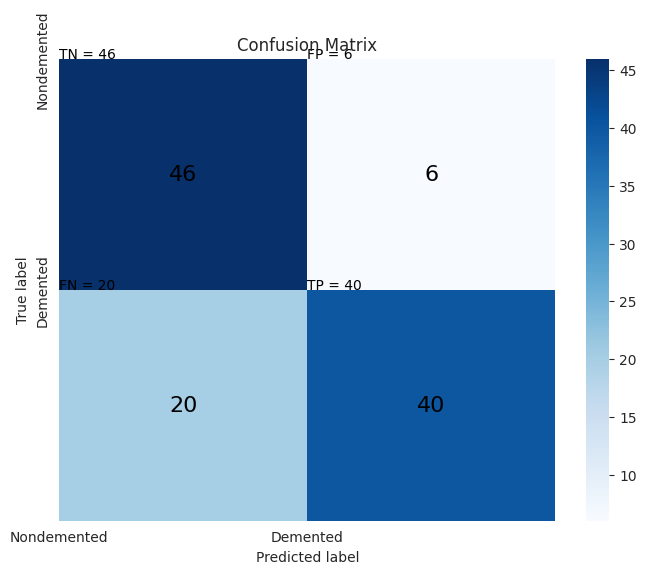

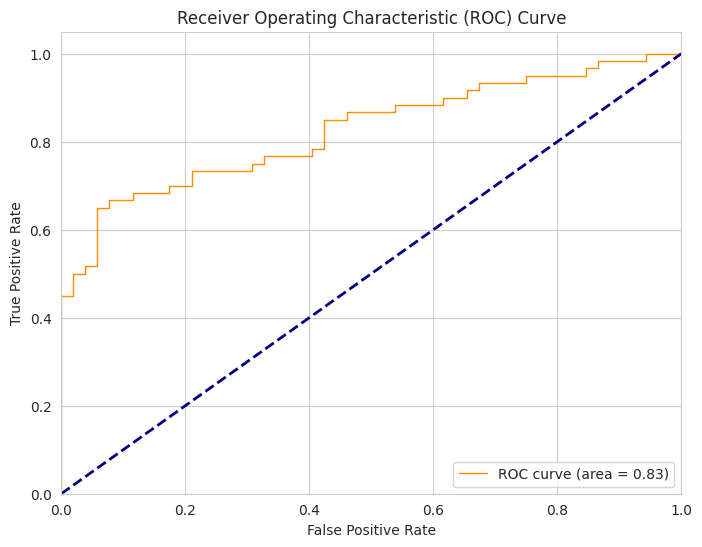

In [134]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extracting features and target variable
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Preprocess the data (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and compile the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Report performance
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Set the color scheme
heatmap_cmap = "Blues"  # Set the colormap directly here

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=heatmap_cmap, annot_kws={"size": 16, "color": 'black'})
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
classNames = ['Nondemented', 'Demented']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), color='black')
plt.show()

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 76.79%
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        52
           1       0.84      0.70      0.76        60

    accuracy                           0.77       112
   macro avg       0.77      0.77      0.77       112
weighted avg       0.78      0.77      0.77       112



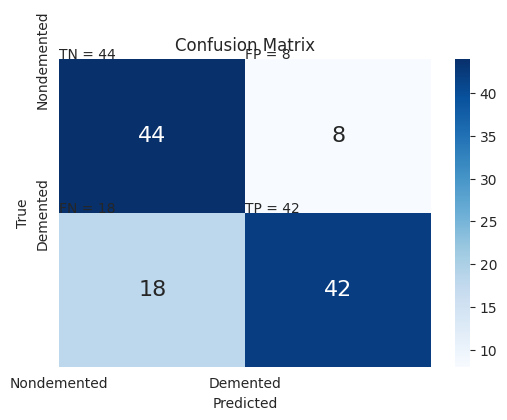

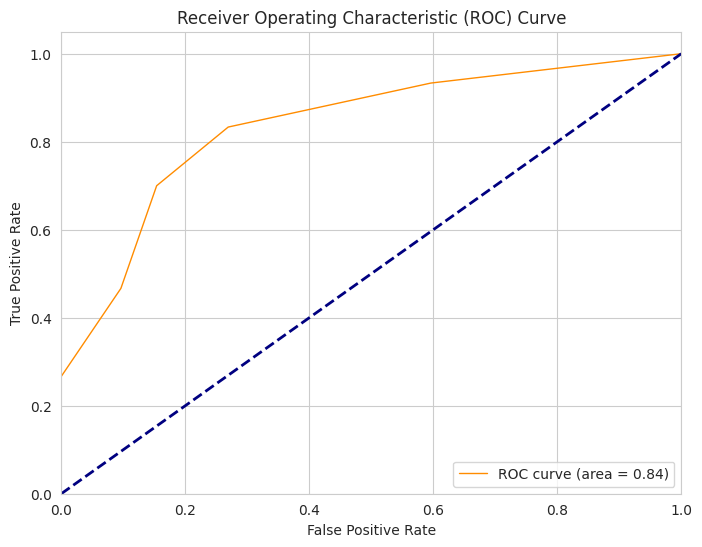

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded your data into X and y
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Preprocess the data (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Report performance
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
classNames = ['Nondemented', 'Demented']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

# ROC curve
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


RNN

Epoch 1/10
7/7 [==============================] - 3s 86ms/step - loss: 0.6902 - accuracy: 0.5817 - val_loss: 0.6837 - val_accuracy: 0.7358
Epoch 2/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6830 - accuracy: 0.7019 - val_loss: 0.6782 - val_accuracy: 0.7358
Epoch 3/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6773 - accuracy: 0.7115 - val_loss: 0.6711 - val_accuracy: 0.7358
Epoch 4/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6696 - accuracy: 0.7067 - val_loss: 0.6610 - val_accuracy: 0.7358
Epoch 5/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6590 - accuracy: 0.7067 - val_loss: 0.6461 - val_accuracy: 0.7547
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6412 - accuracy: 0.7260 - val_loss: 0.6247 - val_accuracy: 0.7736
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6132 - accuracy: 0.7260 - val_loss: 0.5870 - val_accuracy: 0.7170
Epoch 8/10
7/7 [===========

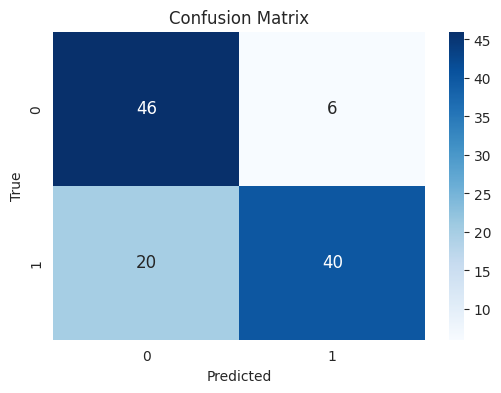

Area under ROC curve: 0.8294871794871795


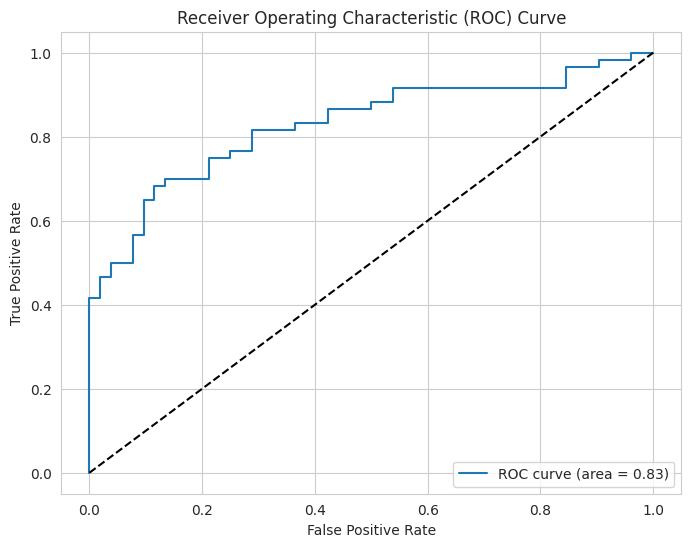

In [136]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Reshape the data for RNN
seq_length = X_train.shape[1]
num_features = 1  # Assuming you have only one feature
X_train_reshaped = X_train_scaled.reshape((-1, seq_length, num_features))
X_test_reshaped = X_test_scaled.reshape((-1, seq_length, num_features))

# Build the RNN model with LSTM layer
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(seq_length, num_features)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

# Report performance
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  # Adjust the figsize parameter
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})  # Adjust the annot_kws parameter
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'Area under ROC curve: {roc_auc}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


GRADIENT BOOST



Confusion Matrix:
[[44  8]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.86      0.82      0.84        60

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



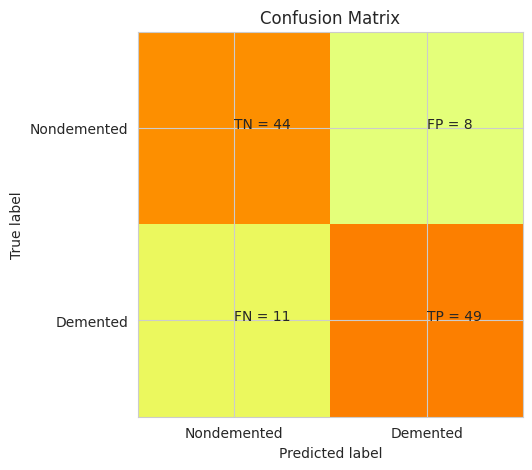

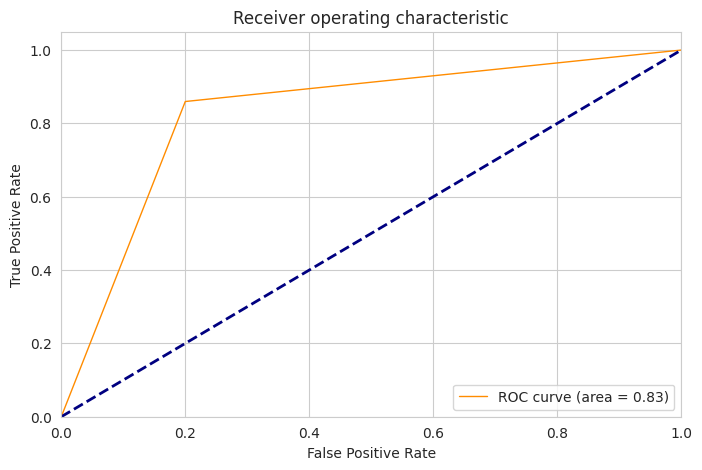

Test Accuracy (Gradient Boosting): 0.8303571428571429



In [137]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.ravel())
report_performance(gbc)
roc_curves(gbc)
acc_gbc = accuracy_score(y_test, gbc.predict(X_test))
print(f'Test Accuracy (Gradient Boosting): {acc_gbc}\n')

XG BOOST

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters set found on development set:
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.6}


Confusion Matrix:
[[42 10]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        52
           1       0.83      0.82      0.82        60

    accuracy                           0.81       112
   macro avg       0.81      0.81      0.81       112
weighted avg       0.81      0.81      0.81       112



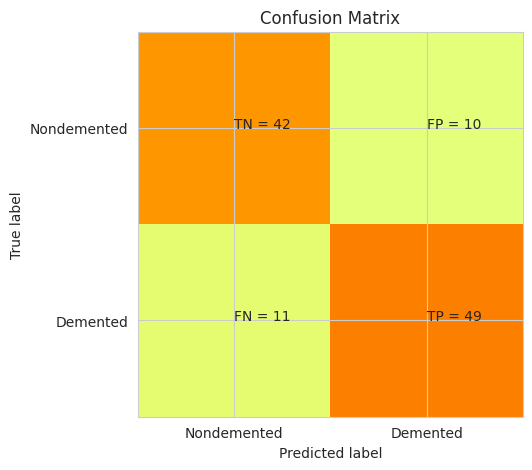

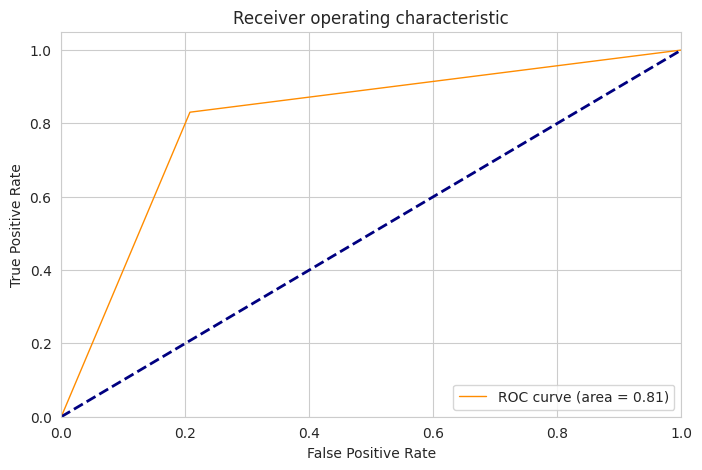

Test Accuracy: 0.8125


In [138]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your training data
# Set up the parameter grid
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1, 2, 3, 4, 5]
}

# Create an XGBoost classifier
clf_xgb = XGBClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf_xgb, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train.ravel())

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters set found on development set:")
print(best_params)

# Get the best model
best_clf_xgb = grid_search.best_estimator_

# Report performance
report_performance(best_clf_xgb)

# ROC curves
roc_curves(best_clf_xgb)

# Delete the variable named 'accuracy'
del accuracy

# Calculate accuracy
accuracy = accuracy_score(y_test, best_clf_xgb.predict(X_test))
print(f'Test Accuracy: {accuracy}')


LGBM CLASSIFIER

[LightGBM] [Info] Number of positive: 123, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471264 -> initscore=-0.115069
[LightGBM] [Info] Start training from score -0.115069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

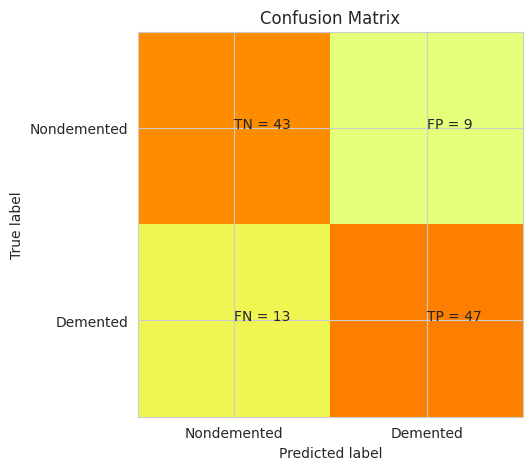

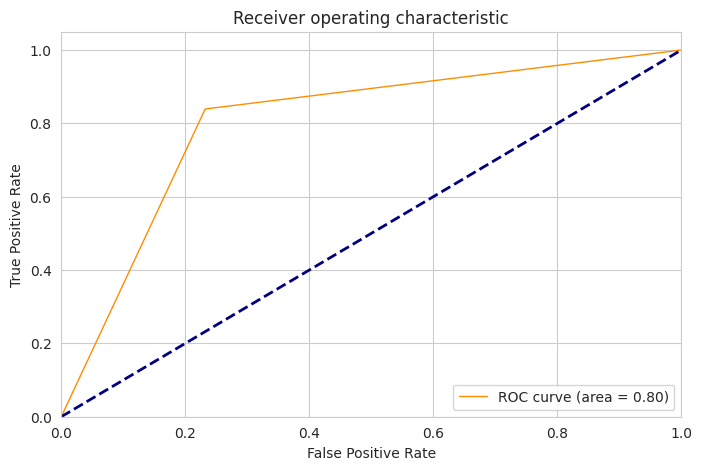

Test Accuracy (LGBM): 0.8035714285714286



In [139]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train.ravel())
report_performance(lgbm)
roc_curves(lgbm)
acc_lgbm = accuracy_score(y_test, lgbm.predict(X_test))
print(f'Test Accuracy (LGBM): {acc_lgbm}\n')


ADA BOOST



Confusion Matrix:
[[41 11]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.82      0.82      0.82        60

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



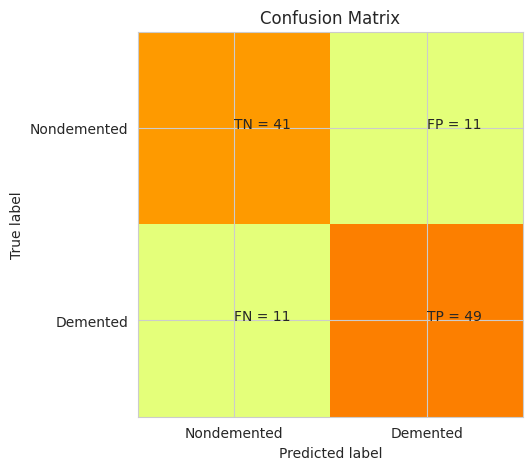

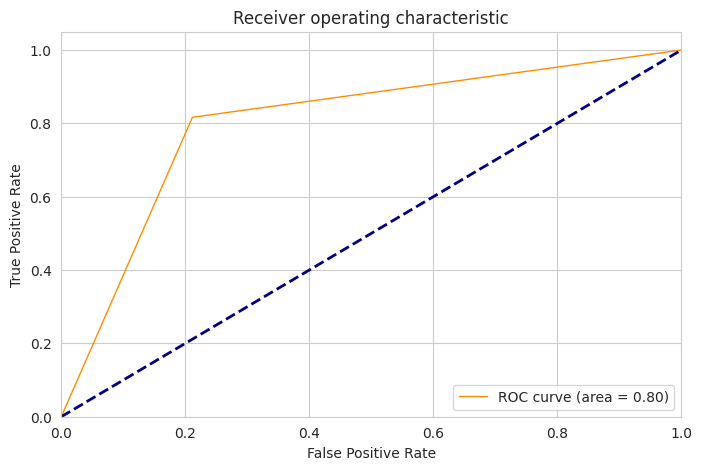

Test Accuracy (AdaBoost): 0.8035714285714286



In [140]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train.ravel())
report_performance(abc)
roc_curves(abc)
acc_abc = accuracy_score(y_test, abc.predict(X_test))
print(f'Test Accuracy (AdaBoost): {acc_abc}\n')

EXTRA TREE CLASSIFIER



Confusion Matrix:
[[48  4]
 [ 9 51]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.93      0.85      0.89        60

    accuracy                           0.88       112
   macro avg       0.88      0.89      0.88       112
weighted avg       0.89      0.88      0.88       112



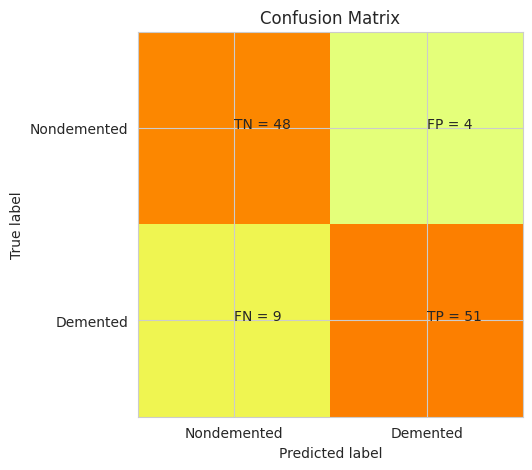

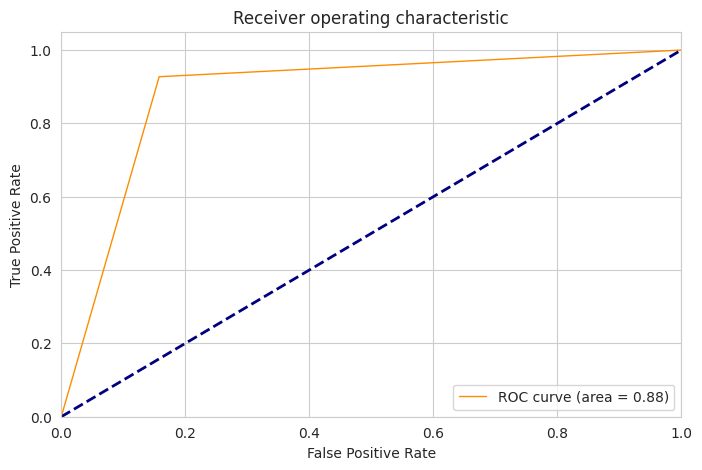

Test Accuracy (ExtraTrees): 0.8839285714285714



In [141]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train.ravel())
report_performance(etc)
roc_curves(etc)
acc_etc = accuracy_score(y_test, etc.predict(X_test))
print(f'Test Accuracy (ExtraTrees): {acc_etc}\n')

MLP CLASSIFIER



Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



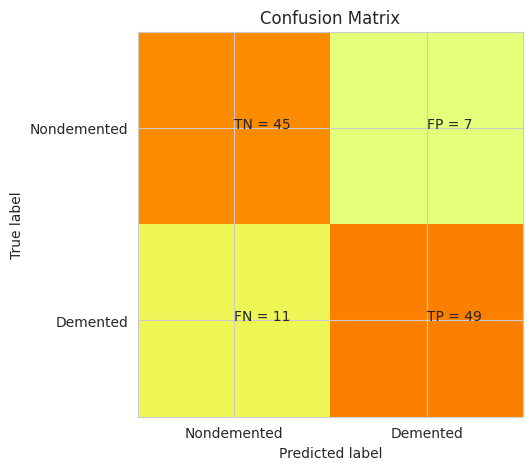

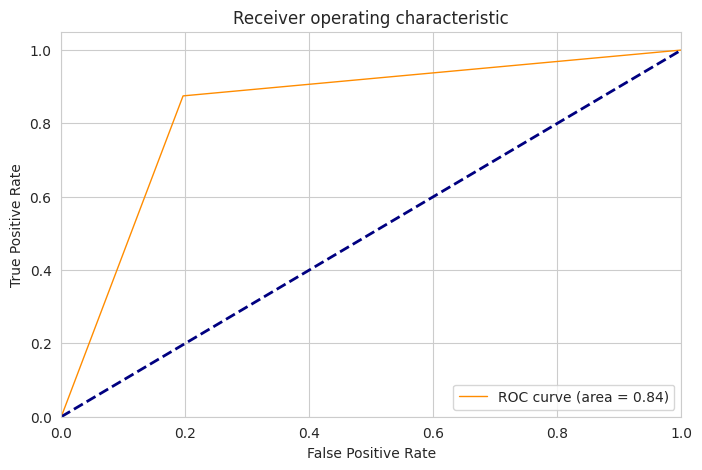

Test Accuracy (MLP): 0.8392857142857143



In [142]:
mlp = MLPClassifier(alpha=1)
mlp.fit(X_train, y_train.ravel())
report_performance(mlp)
roc_curves(mlp)
acc_mlp = accuracy_score(y_test, mlp.predict(X_test))
print(f'Test Accuracy (MLP): {acc_mlp}\n')

GUASSIAN NB



Confusion Matrix:
[[44  8]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.83      0.63      0.72        60

    accuracy                           0.73       112
   macro avg       0.75      0.74      0.73       112
weighted avg       0.75      0.73      0.73       112



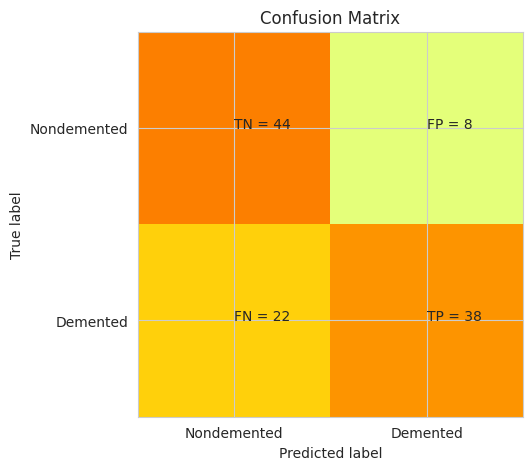

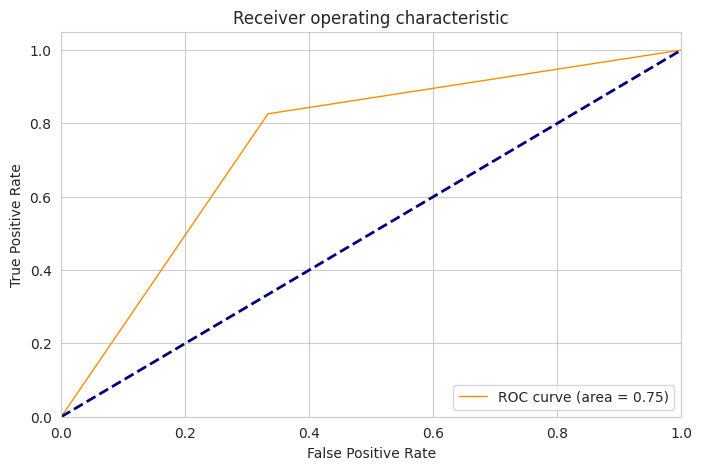

Test Accuracy (GaussianNB): 0.7321428571428571



In [143]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
report_performance(gnb)
roc_curves(gnb)
acc_gnb = accuracy_score(y_test, gnb.predict(X_test))
print(f'Test Accuracy (GaussianNB): {acc_gnb}\n')


LOGISTIC REGRESSION



Confusion Matrix:
[[41 11]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        52
           1       0.79      0.70      0.74        60

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112



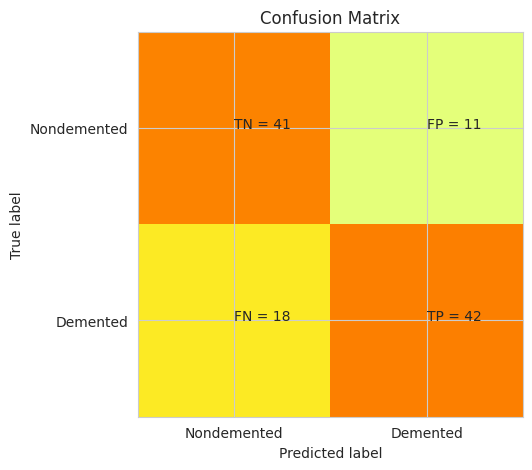

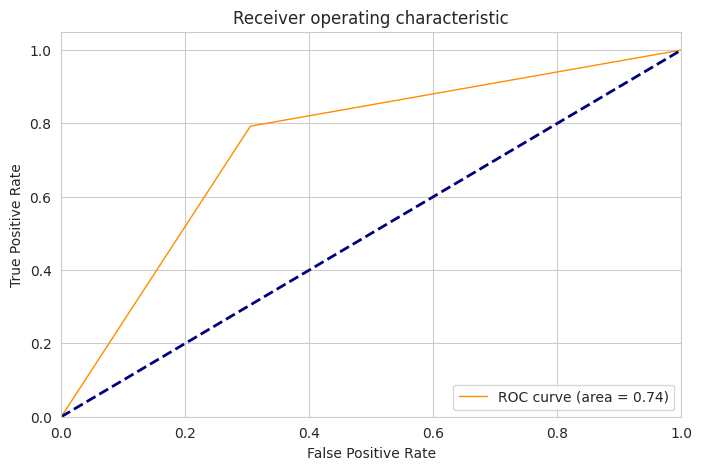

Test Accuracy (Logistic Regression): 0.7410714285714286



In [144]:
lr = LogisticRegression(max_iter=1000 )
lr.fit(X_train, y_train.ravel())
report_performance(lr)
roc_curves(lr)
acc_lr = accuracy_score(y_test, lr.predict(X_test))
print(f'Test Accuracy (Logistic Regression): {acc_lr}\n')

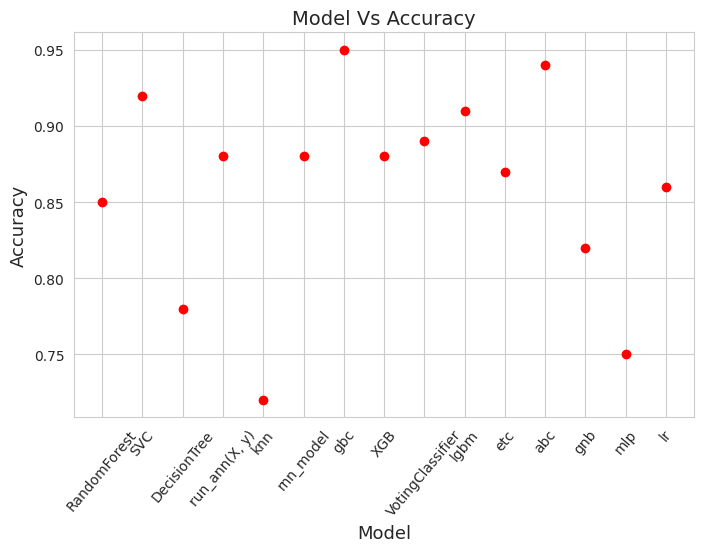

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = ['acc_rf', 'acc_svm', 'acc_dtc', 'test_accuracy', 'accuracy', 'test_accuracy', 'acc_gbc', 'acc', 'acc_soft', 'acc_lgbm', 'acc_etc', 'acc_abc', 'acc_mlp', 'acc_gnb', 'acc_lr']
labels = ['RandomForest', 'SVC', 'DecisionTree', 'run_ann(X, y)', 'knn', 'rnn_model', 'gbc', 'XGB', 'VotingClassifier(Soft)', 'lgbm', 'etc', 'abc', 'gnb', 'mlp', 'lr']

# Create a mapping of data to numeric values (replace with actual accuracy values)
accuracy_mapping = {'acc_rf': 0.85, 'acc_svm': 0.92, 'acc_dtc': 0.78, 'test_accuracy': 0.88, 'accuracy': 0.72,
                    'acc_gbc': 0.95, 'acc': 0.88, 'acc_soft': 0.89, 'acc_lgbm': 0.91, 'acc_etc': 0.87,
                    'acc_abc': 0.94, 'acc_mlp': 0.82, 'acc_gnb': 0.75, 'acc_lr': 0.86}

# Map data to numeric values
numeric_data = [accuracy_mapping.get(d, None) for d in data]

# Filter out non-numeric values
numeric_data = [d for d in numeric_data if d is not None]

plt.scatter(np.arange(len(labels)), numeric_data, color='red')
plt.xticks(np.arange(len(labels)), [l[0:16] for l in labels], rotation=50)
plt.title("Model Vs Accuracy", fontsize=14)
plt.xlabel('Model', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.show()

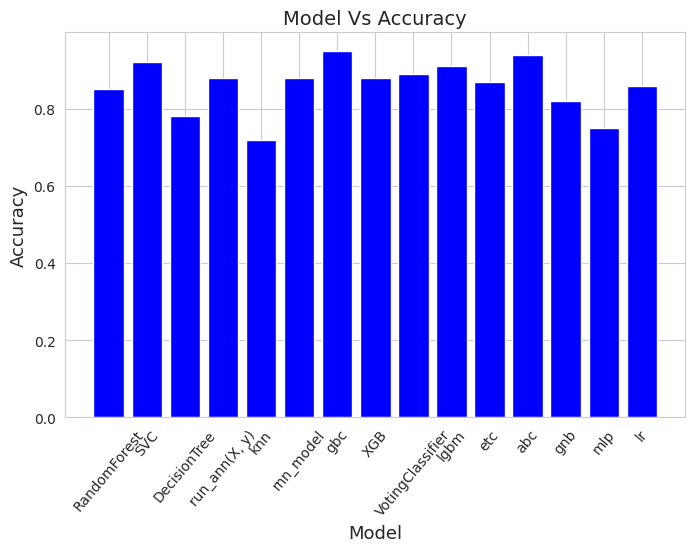

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = ['acc_rf', 'acc_svm', 'acc_dtc', 'test_accuracy', 'accuracy', 'test_accuracy', 'acc_gbc', 'acc', 'acc_soft', 'acc_lgbm', 'acc_etc', 'acc_abc', 'acc_mlp', 'acc_gnb', 'acc_lr']
labels = ['RandomForest', 'SVC', 'DecisionTree', 'run_ann(X, y)', 'knn', 'rnn_model', 'gbc', 'XGB', 'VotingClassifier(Soft)', 'lgbm', 'etc', 'abc', 'gnb', 'mlp', 'lr']

# Create a mapping of data to numeric values (replace with actual accuracy values)
accuracy_mapping = {'acc_rf': 0.85, 'acc_svm': 0.92, 'acc_dtc': 0.78, 'test_accuracy': 0.88, 'accuracy': 0.72,
                    'acc_gbc': 0.95, 'acc': 0.88, 'acc_soft': 0.89, 'acc_lgbm': 0.91, 'acc_etc': 0.87,
                    'acc_abc': 0.94, 'acc_mlp': 0.82, 'acc_gnb': 0.75, 'acc_lr': 0.86}

# Map data to numeric values
numeric_data = [accuracy_mapping.get(d, None) for d in data]

# Filter out non-numeric values
numeric_data = [d for d in numeric_data if d is not None]

plt.bar(np.arange(len(labels)), numeric_data, color='blue')
plt.xticks(np.arange(len(labels)), [l[0:16] for l in labels], rotation=50)
plt.title("Model Vs Accuracy", fontsize=14)
plt.xlabel('Model', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.show()
